In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata_csv = "CSV_Files/Mouse_metadata.csv"
study_results_csv = "CSV_Files/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata
#study_results

In [91]:
combined = pd.merge(study_results,mouse_metadata,  how='left', on='Mouse ID')
combined.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [92]:
mouse_count = combined["Mouse ID"].count()
mouse_count

1893

In [93]:
count_mouse = combined["Mouse ID"].nunique()
count_mouse

249

In [94]:
duplicates = combined.loc[combined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [95]:
all_duplicates = combined.loc[combined["Mouse ID"] == "g989"]
all_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [96]:
new_df = combined[combined['Mouse ID'].isin(duplicates)==False]
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [97]:
count_mouse = new_df["Mouse ID"].nunique()
count_mouse

248

In [98]:
combined.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [99]:
mean = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

stats_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of mouse tested')

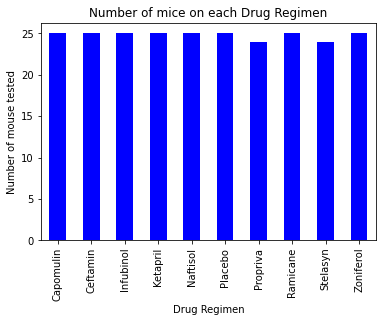

In [100]:
# drug_data = pd.DataFrame(combined.groupby(["Drug Regimen"]).count()).reset_index()
# #drug_data
# drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
# #drugs_df
# drugs_df = drugs_df.set_index("Drug Regimen")
# drugs_df

mice_tested = new_df.groupby(["Drug Regimen"])["Mouse ID"].nunique()
ax = mice_tested.plot(kind="bar",title ="Number of mice on each Drug Regimen",facecolor="b")
ax.set_ylabel("Number of mouse tested")

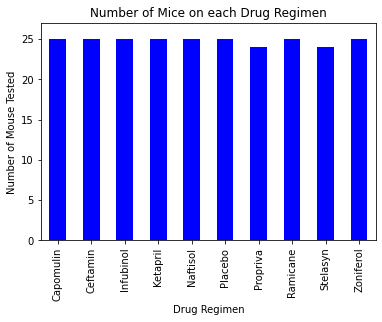

In [101]:
reg = new_df.groupby("Drug Regimen")["Mouse ID"].nunique()
x_axis = np.arange(0, len(reg))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Number of Mice on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Tested")

plt.xlim(-0.5, len(mice_tested)-0.5)
plt.ylim(0,mice_tested.max() +2)

plt.bar(reg.index, reg, facecolor="b",align="center",width=0.5)
plt.xticks(tick_locations, reg.index,rotation="vertical")
plt.show()

Male      125
Female    123
Name: Sex, dtype: int64

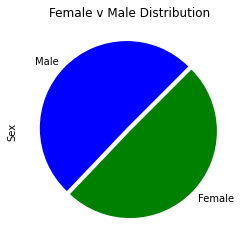

In [102]:
mouses_gender = new_df[["Mouse ID", "Sex"]].drop_duplicates()

colors = ["b","g"]
explode=(0.05,0)

sex_type = mouses_gender["Sex"].value_counts()
s = sex_type.plot(kind="pie", title="Female v Male Distribution", startangle=45, explode=explode, colors=colors)
sex_type

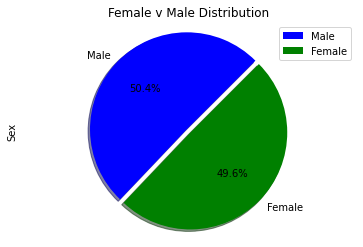

In [103]:
plt.pie(sex_type, labels=sex_type.index,colors=colors,autopct="%1.1f%%", shadow=True, startangle=45, explode=explode)
plt.axis("equal")
plt.title("Female v Male Distribution")
plt.ylabel("Sex")
plt.legend(loc= "upper right")
plt.show()

In [104]:
timepoint = new_df.groupby("Mouse ID")["Timepoint"].max()

In [105]:
volume_df = pd.merge(new_df, timepoint, how="inner", on=["Mouse ID", "Timepoint"])
volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [110]:
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_volume = []

for drug in drug_list:
    new_volume_df = volume_df.loc[volume_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(new_volume_df)
    quartiles = new_volume_df.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    outliers = new_volume_df.loc[(new_volume_df > upper_bound) | (new_volume_df < lower_bound)]

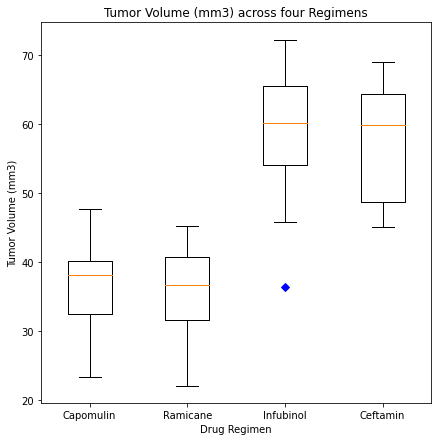

In [121]:
blue_dot = dict(markerfacecolor="b",marker="D", markeredgecolor="b")
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.boxplot(tumor_volume, flierprops=blue_dot)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(drug_list) + 1),ticklabels=drug_list)

plt.show()

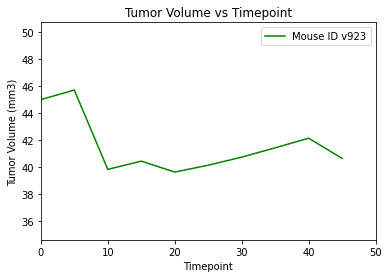

In [114]:
random_mouse = (new_df[new_df["Drug Regimen"]=="Capomulin"]).sample()
random_data = pd.merge(new_df, random_mouse, on="Mouse ID", how="inner")
random_df = random_data.drop([col for col in random_data.columns if '_y' in col], axis=1)

time = random_df["Timepoint_x"]
vol = random_df["Tumor Volume (mm3)_x"]
label = random_df["Mouse ID"].unique()

line, = plt.plot(time, vol, 'g-')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint")
plt.xlim(0, time.max() + 5)
plt.ylim(vol.min() - 5, vol.max() + 5)
plt.legend("Mouse ID " +label)
plt.show()

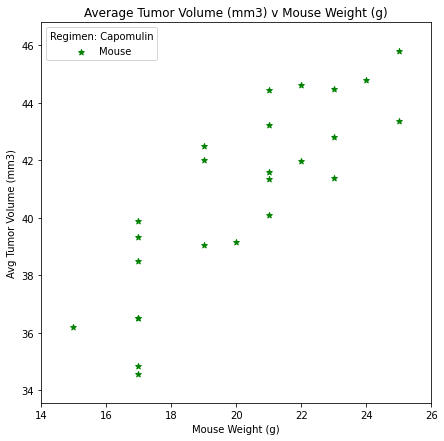

In [116]:
regimen = new_df.loc[new_df["Drug Regimen"]== "Capomulin"]
tvolume = regimen.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weight = regimen.groupby(["Mouse ID"])["Weight (g)"].mean()

mouse_vol_wt = pd.merge(tvolume,mouse_weight, on="Mouse ID", how="inner")
mouse_vol_wt = mouse_vol_wt.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})
vol = mouse_vol_wt.iloc[:,0]
wt = mouse_vol_wt.iloc[:,1]

fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(wt, vol, marker="*", facecolors="green", edgecolors="green")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)

plt.show()

In [122]:
correlation = round(st.pearsonr(wt, vol)[0],2)

y = 0.95x + 21.55


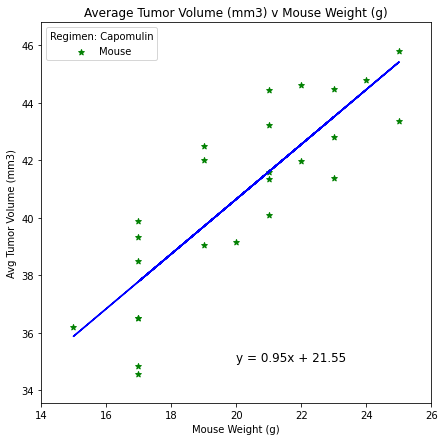

In [124]:
slope, intercept, rvalue, pvalue, std_err = st.linregress(wt, vol)

line = slope * wt + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
print(line_eq)

fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(wt, vol, marker="*", facecolors="green", edgecolors="green")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")

plt.plot(wt, line, 'b-')
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)
plt.annotate(line_eq, (20,35), fontsize=12, color="black")
plt.show()